In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
test = pd.read_csv('ArbuzTest.csv')
train = pd.read_csv('ArbuzTrain.csv')

In [5]:
train.head()

,client_id,average_check,number_orders,average_score,items_per_order,is_friend,last_check,last_score,last_scored_after_order_days,last_late_by_minutes,...,items_share_category_19,items_share_category_20,items_share_category_21,items_share_category_22,items_share_category_23,items_share_category_24,items_share_category_25,items_share_category_26,items_share_category_27,is_churn
0,301,49300,7,10.0,23.4286,0,9250.0,NaN,NaN,0,...,0.0,0.0,0.01,0.0,0.00,0.00,0.01,0.0,0.00,0
1,9394,58900,7,10.0,5.4286,0,24547.0,NaN,NaN,0,...,0.0,0.0,0.00,0.0,0.00,0.03,0.00,0.0,0.00,0
2,6680,43100,6,10.0,15.3333,0,6017.0,NaN,NaN,0,...,0.0,0.0,0.00,0.0,0.00,0.22,0.00,0.0,0.02,0
3,4774,33900,8,4.0,9.6250,0,7316.0,NaN,NaN,0,...,0.0,0.0,0.01,0.0,0.06,0.35,0.00,0.0,0.17,0
4,2722,37900,9,10.0,14.2222,0,2175.0,10.0,0.0,0,...,0.0,0.0,0.00,0.0,0.04,0.22,0.00,0.0,0.01,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10984 entries, 0 to 10983
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   client_id                     10984 non-null  int64  
 1   average_check                 10984 non-null  int64  
 2   number_orders                 10984 non-null  int64  
 3   average_score                 9187 non-null   float64
 4   items_per_order               10984 non-null  float64
 5   is_friend                     10984 non-null  int64  
 6   last_check                    10979 non-null  float64
 7   last_score                    3788 non-null   float64
 8   last_scored_after_order_days  3788 non-null   float64
 9   last_late_by_minutes          10984 non-null  int64  
 10  is_last_order_fullfilled      10984 non-null  int64  
 11  items_share_category_1        10984 non-null  float64
 12  items_share_category_2        10984 non-null  float64
 13  i

In [7]:
churn = train[train['is_churn']==1]

In [10]:
non_churn = train[train['is_churn']==0]

In [9]:
churn.describe()

,client_id,average_check,number_orders,average_score,items_per_order,is_friend,last_check,last_score,last_scored_after_order_days,last_late_by_minutes,...,items_share_category_19,items_share_category_20,items_share_category_21,items_share_category_22,items_share_category_23,items_share_category_24,items_share_category_25,items_share_category_26,items_share_category_27,is_churn
count,2479.000000,2479.000000,2479.000000,1998.000000,2479.000000,2479.000000,2476.000000,758.000000,758.000000,2479.000000,...,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.0
mean,7936.622428,54360.427592,10.419524,9.287502,14.970551,0.067366,15508.959261,9.416887,5.402375,1.778943,...,0.000097,0.000004,0.001049,0.001307,0.008911,0.229375,0.058286,0.002888,0.033312,1.0
std,3853.415581,30682.200517,6.728857,1.156656,7.366960,0.250705,12016.632725,1.313613,17.017059,9.523194,...,0.001267,0.000201,0.003794,0.006782,0.018467,0.147387,0.071786,0.009160,0.034325,0.0
min,2.000000,0.000000,6.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,4924.500000,34200.000000,7.000000,8.888900,9.949900,0.000000,7949.500000,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.010000,0.000000,0.010000,1.0
50%,8551.000000,46700.000000,8.000000,10.000000,14.000000,0.000000,11732.000000,10.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.040000,0.000000,0.030000,1.0
75%,11312.000000,65600.000000,11.000000,10.000000,19.020000,0.000000,19259.250000,10.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010000,0.320000,0.080000,0.000000,0.050000,1.0
max,13729.000000,384400.000000,75.000000,10.000000,52.500000,1.000000,159888.000000,10.000000,206.000000,171.000000,...,0.030000,0.010000,0.040000,0.150000,0.470000,0.960000,0.930000,0.160000,0.400000,1.0


In [11]:
non_churn.describe()

,client_id,average_check,number_orders,average_score,items_per_order,is_friend,last_check,last_score,last_scored_after_order_days,last_late_by_minutes,...,items_share_category_19,items_share_category_20,items_share_category_21,items_share_category_22,items_share_category_23,items_share_category_24,items_share_category_25,items_share_category_26,items_share_category_27,is_churn
count,8505.000000,8505.000000,8505.00000,7189.000000,8505.000000,8505.000000,8503.000000,3030.000000,3030.000000,8505.000000,...,8505.000000,8505.000000,8505.000000,8505.000000,8505.000000,8505.000000,8505.000000,8505.000000,8505.000000,8505.0
mean,6552.166020,61977.965902,18.81117,9.307473,15.969685,0.171429,18466.914798,9.493069,4.462046,1.892887,...,0.000056,0.000005,0.000717,0.001338,0.008790,0.234288,0.054963,0.005086,0.034252,0.0
std,3943.231193,33350.764938,38.11362,1.203266,7.192676,0.376905,14017.513456,1.295719,10.070749,10.585846,...,0.000810,0.000266,0.003467,0.006493,0.014841,0.136342,0.061386,0.018137,0.030750,0.0
min,1.000000,500.000000,6.00000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3152.000000,39400.000000,9.00000,9.000000,11.083300,0.000000,9154.500000,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.020000,0.000000,0.010000,0.0
50%,6395.000000,54000.000000,14.00000,9.909100,14.888900,0.000000,14417.000000,10.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,0.040000,0.000000,0.030000,0.0
75%,9852.000000,75100.000000,23.00000,10.000000,19.933300,0.000000,23395.000000,10.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010000,0.320000,0.080000,0.010000,0.050000,0.0
max,13728.000000,419000.000000,3251.00000,10.000000,65.857100,1.000000,202298.000000,10.000000,153.000000,478.000000,...,0.020000,0.020000,0.100000,0.190000,0.320000,1.000000,0.950000,0.750000,0.330000,0.0


In [12]:
churn.isnull().sum()

client_id                          0
average_check                      0
number_orders                      0
average_score                    481
items_per_order                    0
is_friend                          0
last_check                         3
last_score                      1721
last_scored_after_order_days    1721
last_late_by_minutes               0
is_last_order_fullfilled           0
items_share_category_1             0
items_share_category_2             0
items_share_category_3             0
items_share_category_4             0
items_share_category_5             0
items_share_category_6             0
items_share_category_7             0
items_share_category_8             0
items_share_category_9             0
items_share_category_10            0
items_share_category_11            0
items_share_category_12            0
items_share_category_13            0
items_share_category_14            0
items_share_category_15            0
items_share_category_16            0
i

{'whiskers': [<matplotlib.lines.Line2D at 0x1574922a310>,
 'caps': [<matplotlib.lines.Line2D at 0x1574922a9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x157492256a0>],
 'medians': [<matplotlib.lines.Line2D at 0x157492580d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15749258430>],
 'means': []}

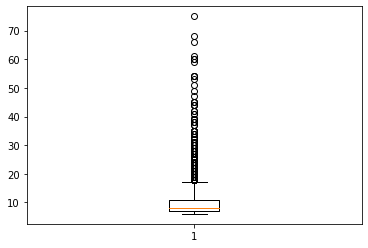

In [16]:
plt.boxplot(churn['number_orders'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15749368400>,
 'caps': [<matplotlib.lines.Line2D at 0x15749368ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x157493680a0>],
 'medians': [<matplotlib.lines.Line2D at 0x157493731c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15749373520>],
 'means': []}

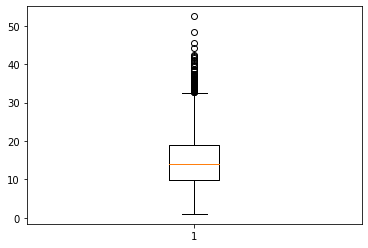

In [19]:
plt.boxplot(churn['items_per_order'])

<h1>Linear Model</h1>

In [64]:
X = train[['average_score', 'number_orders', 'items_per_order', 'average_check', 'last_check', 'last_score', 'last_scored_after_order_days', 'last_late_by_minutes']]
y = train['is_churn']

In [66]:
X.isnull().sum()

average_score                   1797
number_orders                      0
items_per_order                    0
average_check                      0
last_check                         5
last_score                      7196
last_scored_after_order_days    7196
last_late_by_minutes               0
dtype: int64

In [69]:
X['average_score'].fillna(X['average_score'].mean(), inplace=True)
X['last_score'].fillna(X['last_score'].mean(), inplace=True)
X['last_scored_after_order_days'].fillna(X['last_scored_after_order_days'].mean(), inplace=True)
X['last_check'].fillna(X['last_check'].mean(), inplace=True)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [72]:
lm = LinearRegression()

In [73]:
np.any(np.isnan(X))
np.all(np.isfinite(X))

True

In [74]:
lm.fit(X_train,y_train)

LinearRegression()

In [75]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-8.19291142e-04 -8.28358635e-04  1.10946786e-03 -8.43824540e-07
 -1.76389375e-06 -2.86315533e-03  1.24245491e-03  6.39246061e-04]


In [76]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

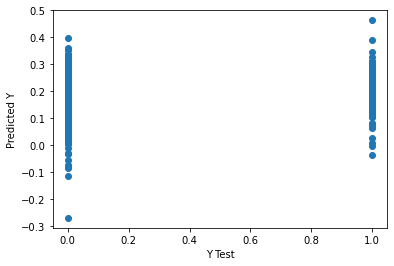

In [77]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [78]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.34333624604966606
MSE: 0.1701230612850397
RMSE: 0.4124597692927635


C:\Users\bekzb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


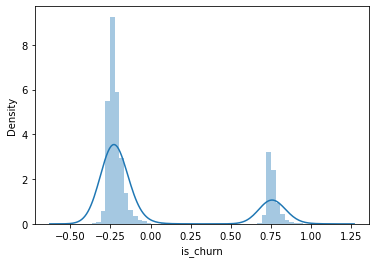

In [79]:
sns.distplot((y_test-predictions),bins=50);

In [80]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
average_score,-8.192911e-04
number_orders,-8.283586e-04
items_per_order,1.109468e-03
average_check,-8.438245e-07
last_check,-1.763894e-06
last_score,-2.863155e-03
last_scored_after_order_days,1.242455e-03
last_late_by_minutes,6.392461e-04


<h1> Decision Tree </h1>

In [81]:
from sklearn.tree import DecisionTreeClassifier 

In [82]:
dtree = DecisionTreeClassifier()

In [83]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
predictions_dtree = dtree.predict(X_test)

In [85]:
from sklearn.metrics import classification_report,confusion_matrix

In [86]:
print(classification_report(y_test,predictions_dtree))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      3406
           1       0.30      0.31      0.30       988

    accuracy                           0.68      4394
   macro avg       0.55      0.55      0.55      4394
weighted avg       0.69      0.68      0.68      4394



In [87]:
print(confusion_matrix(y_test,predictions_dtree))

[[2689  717]
 [ 682  306]]


<h1>Random Forest</h1>

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
rfc_pred = rfc.predict(X_test)

In [90]:
print(confusion_matrix(y_test,rfc_pred))

[[3233  173]
 [ 875  113]]


In [91]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      3406
           1       0.40      0.11      0.18       988

    accuracy                           0.76      4394
   macro avg       0.59      0.53      0.52      4394
weighted avg       0.70      0.76      0.71      4394



In [92]:
test_data = test
test_data['average_score'].fillna(test_data['average_score'].mean(), inplace=True)

In [94]:
test_data['last_score'].fillna(test_data['average_score'], inplace=True)
test_data['last_scored_after_order_days'].fillna(test_data['last_scored_after_order_days'].mean(), inplace=True)
test_data['number_orders'] = test_data['number_orders'].fillna(test_data['number_orders'].mean(),)
test_data['last_check'] = test_data['last_check'].fillna(test_data['average_check'],)

In [95]:
y_pred = dtree.predict(test[['average_score', 'number_orders', 'items_per_order', 'average_check',
       'last_check', 'last_score', 'last_scored_after_order_days',
       'last_late_by_minutes']])

In [96]:
test_data.insert(38, "is_churn", y_pred, True)

test_data[['client_id', 'is_churn']].to_csv('res.csv', index=False)

<h1>Linear Model Test</h1>

In [109]:
y_pred_1 = lm.predict(test[['average_score', 'number_orders', 'items_per_order', 'average_check',
       'last_check', 'last_score', 'last_scored_after_order_days',
       'last_late_by_minutes']])

In [98]:
test_data.insert(38, "is_churn", y_pred_1, True)

test_data[['client_id', 'is_churn']].to_csv('res_1.csv', index=False)

<h1>Logistic Regression</h1>

In [99]:
from sklearn.linear_model import LogisticRegression

In [101]:
logmodel = LogisticRegression()

In [102]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [103]:
log_pred = logmodel.predict(X_test)

In [106]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      3406
           1       0.00      0.00      0.00       988

    accuracy                           0.78      4394
   macro avg       0.39      0.50      0.44      4394
weighted avg       0.60      0.78      0.68      4394



C:\Users\bekzb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bekzb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bekzb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
y_pred_2 = logmodel.predict(test[['average_score', 'number_orders', 'items_per_order', 'average_check',
       'last_check', 'last_score', 'last_scored_after_order_days',
       'last_late_by_minutes']])

In [110]:
test_data.insert(38, "is_churn", y_pred_2, True)

test_data[['client_id', 'is_churn']].to_csv('res_2.csv', index=False)